# 0. Decompress, Read, show

In [1]:
from mxlParsing import *

#decompress
name = 'Imagine_Dragons_-_Radioactive'
ifiledir = decompressMXL(name)

music21: Certain music21 functions might need the optional package scipy;
                  if you run into errors, install it by following the instructions at
                  http://mit.edu/music21/doc/installing/installAdditional.html


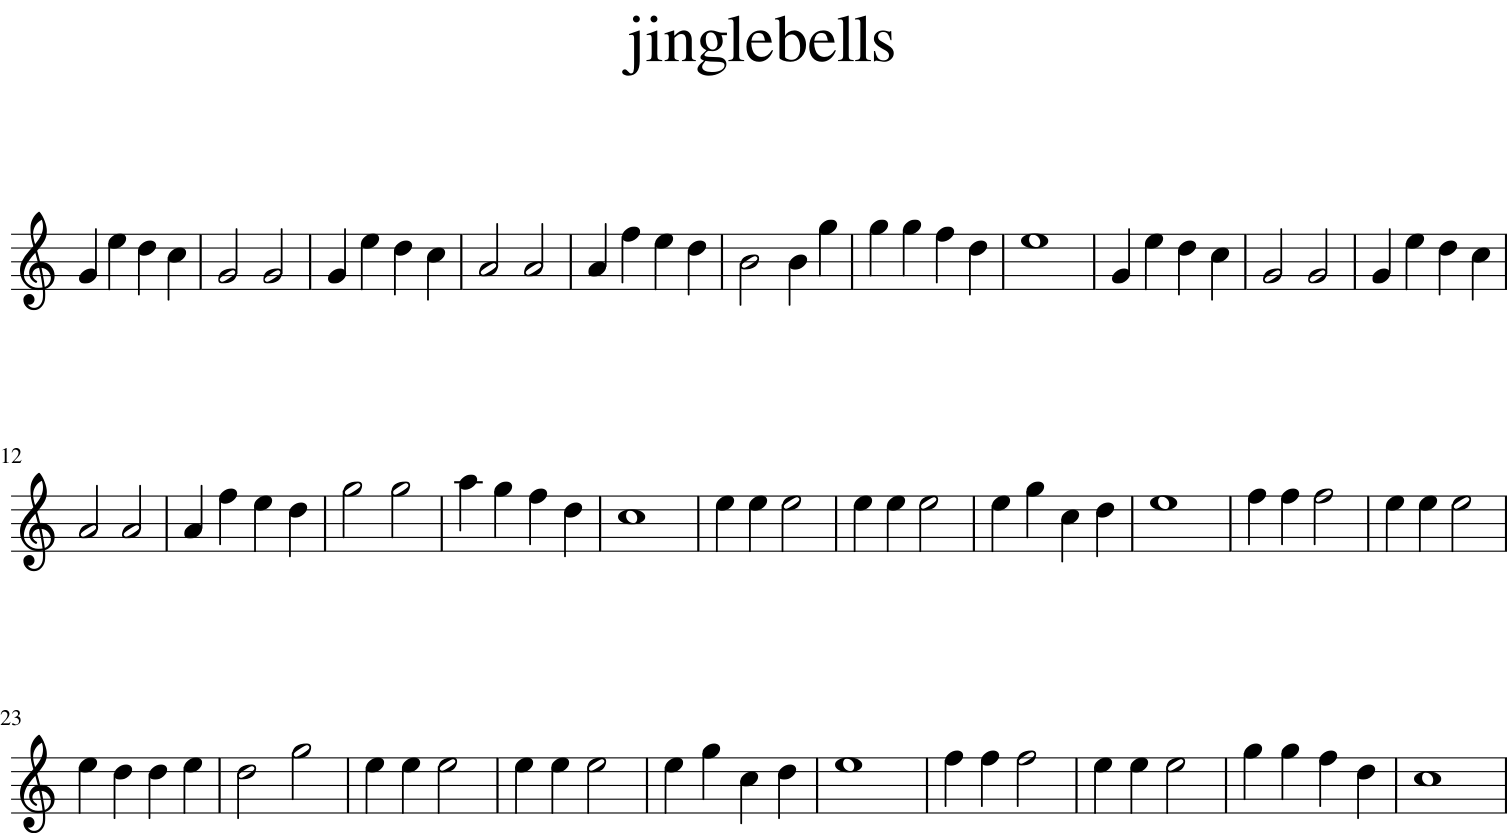

In [27]:
#read xml from /inputs
name = 'jinglebells'
filedir = '../Inputs/'+ name + '.musicxml'
scoreOriginal = xmlToScore(filedir)

#show
#make parts
m21Part_main = measures_to_m21Part(scoreOriginal.measures)

#build
m21score = build_m21Score_1p(m21Part_main,name,scoreOriginal.ts)
#score.show('lily.png')
m21score.show()

In [3]:
m21score.show('midi')

# 1. Invert

## 1.1 Invert and show

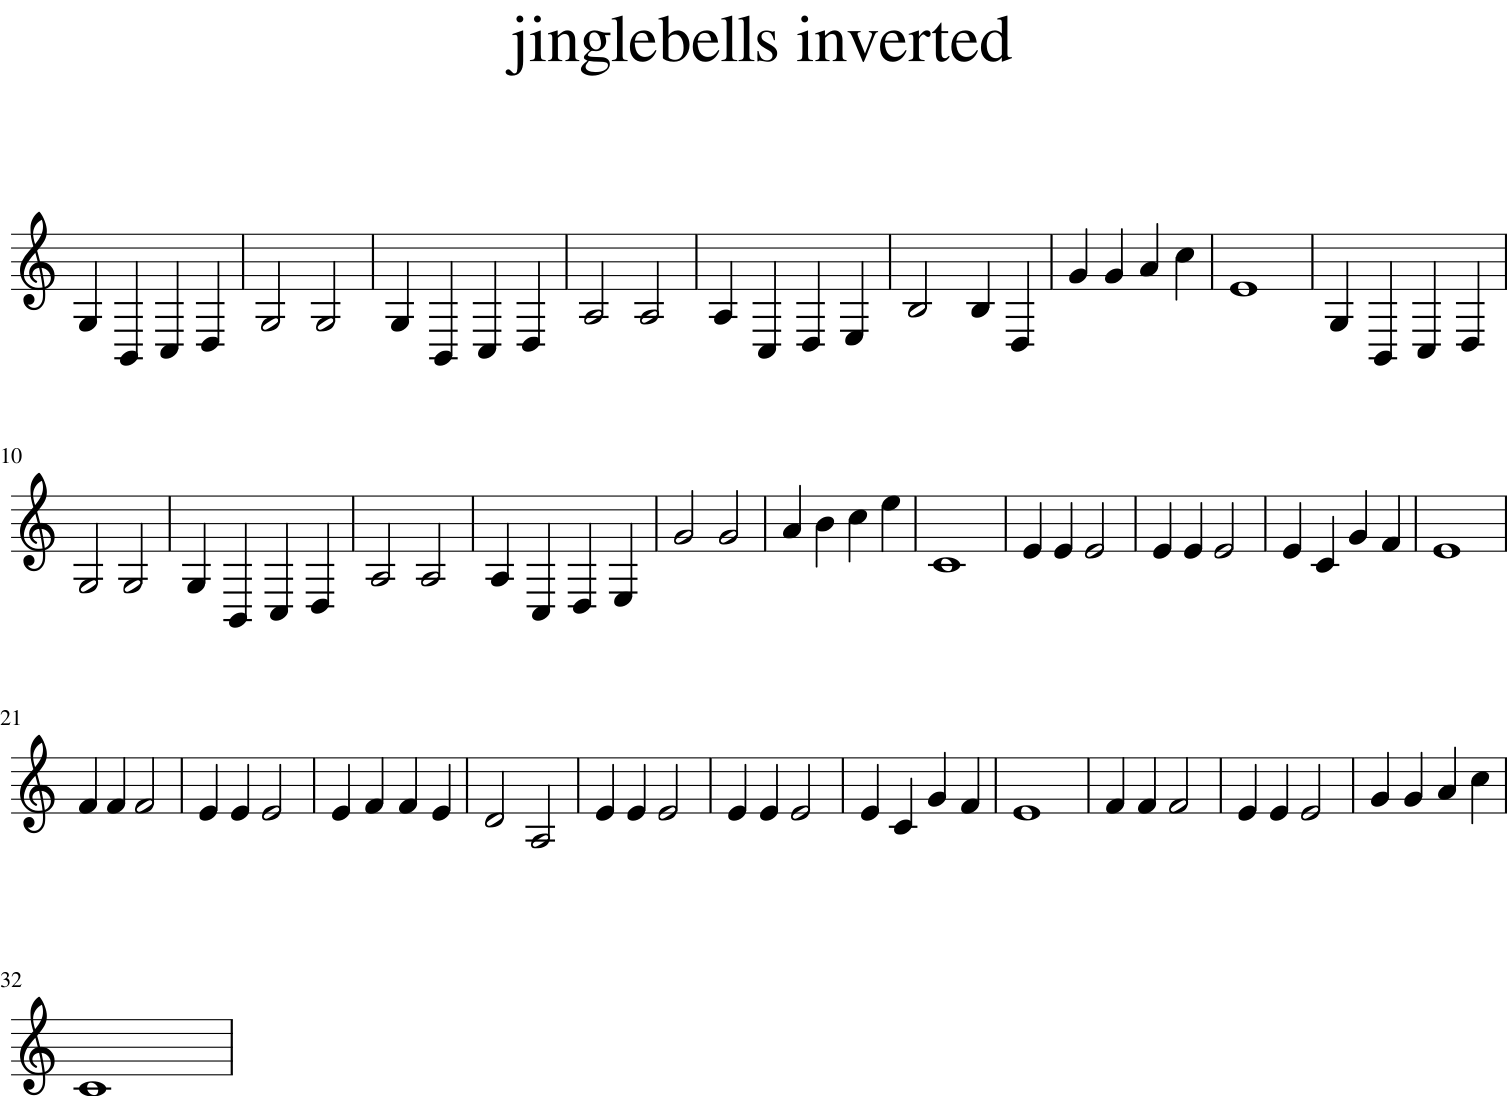

In [4]:
measures = scoreOriginal.measures
ts = scoreOriginal.ts
title = name + ' inverted'

#get inv measures
inv_measures = []
for measure in measures:
    inv_measures.append(get_inverted_measure(measure))
    
#make parts
m21Part_main = measures_to_m21Part(inv_measures)

#build
m21score_inv = build_m21Score_1p(m21Part_main,title,ts,clef='bass')
m21score_inv.show()

In [5]:
m21score_inv.show('midi')

In [8]:
fname = name + '_inv'
fp = '../Outputs/'+ fname + '.mid'
m21score_inv.write('midi', fp=fp)

'../Outputs/jinglebells_inv.mid'

## 1.2 Invert, accompany, show

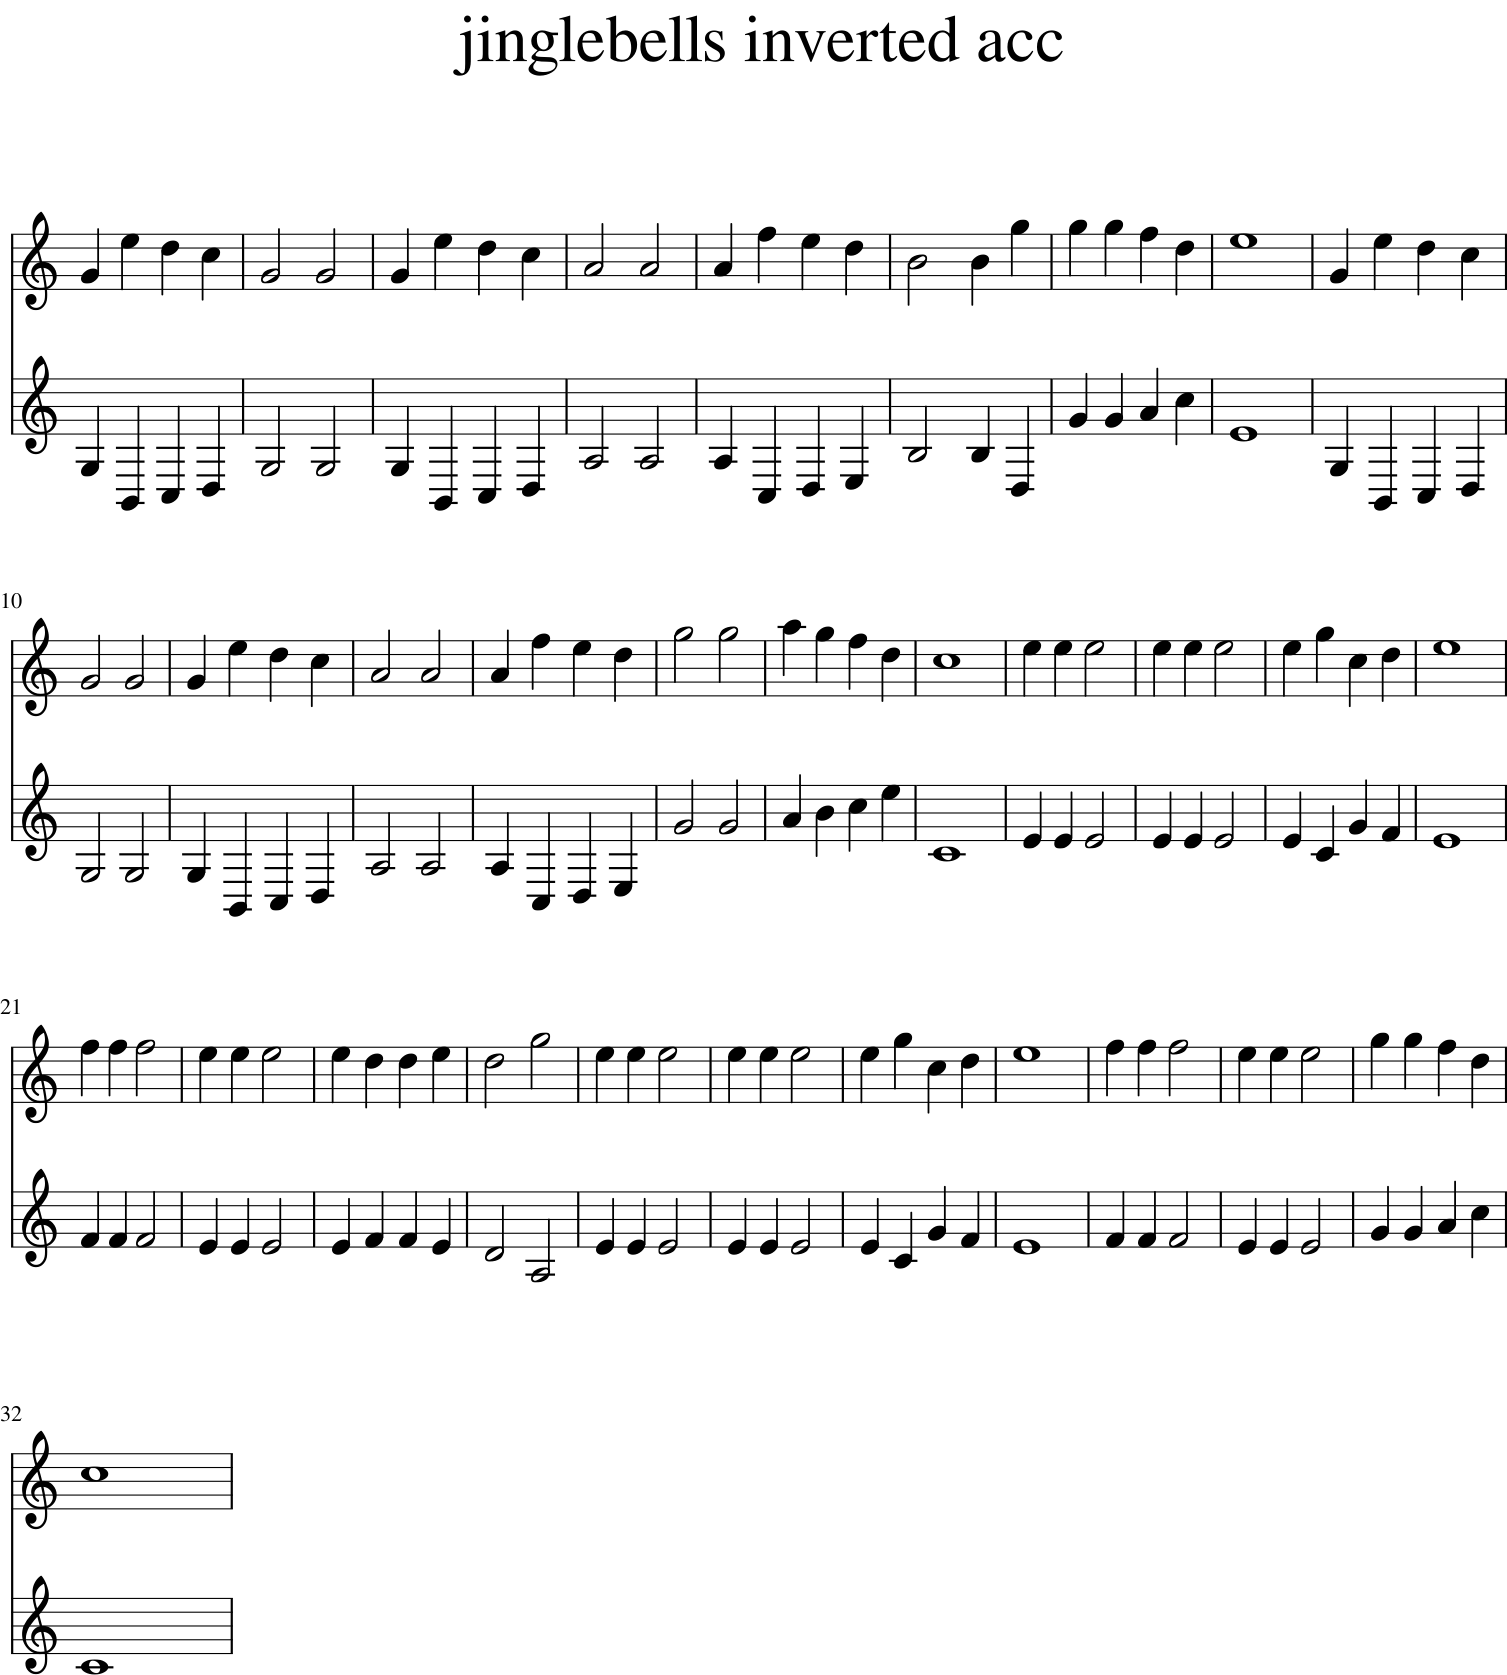

In [6]:
measures = scoreOriginal.measures
ts = scoreOriginal.ts
title = name + ' inverted acc'

#get inv measures
inv_measures = []
for measure in measures:
    inv_measures.append(get_inverted_measure(measure))
    
#make parts
m21Part_main = measures_to_m21Part(measures)
m21Part_acc = measures_to_m21Part(inv_measures)

#build
m21score_invacc = build_m21Score_2p(m21Part_main,m21Part_acc,title,ts)
m21score_invacc.show()

In [7]:
m21score_invacc.show('midi')

In [9]:
fname = name + '_invacc'
fp = '../Outputs/'+ fname + '.mid'
m21score_invacc.write('midi', fp=fp)

'../Outputs/jinglebells_invacc.mid'

## 1.3 Invert, mutate, accompany, show

In [31]:
measures = scoreOriginal.measures
ts = scoreOriginal.ts
title = name + ' inverted acc'

#get inv measures
inv_measures = []
for measure in measures:
    inv_measures.append(get_inverted_measure(measure))
invScore = Score(inv_measures)

In [32]:
from GAComposition import *

#mutate
GAAlg = GAComposition(invScore)
GAAlg.evolve(2)
top3 = GAAlg.getTop3()

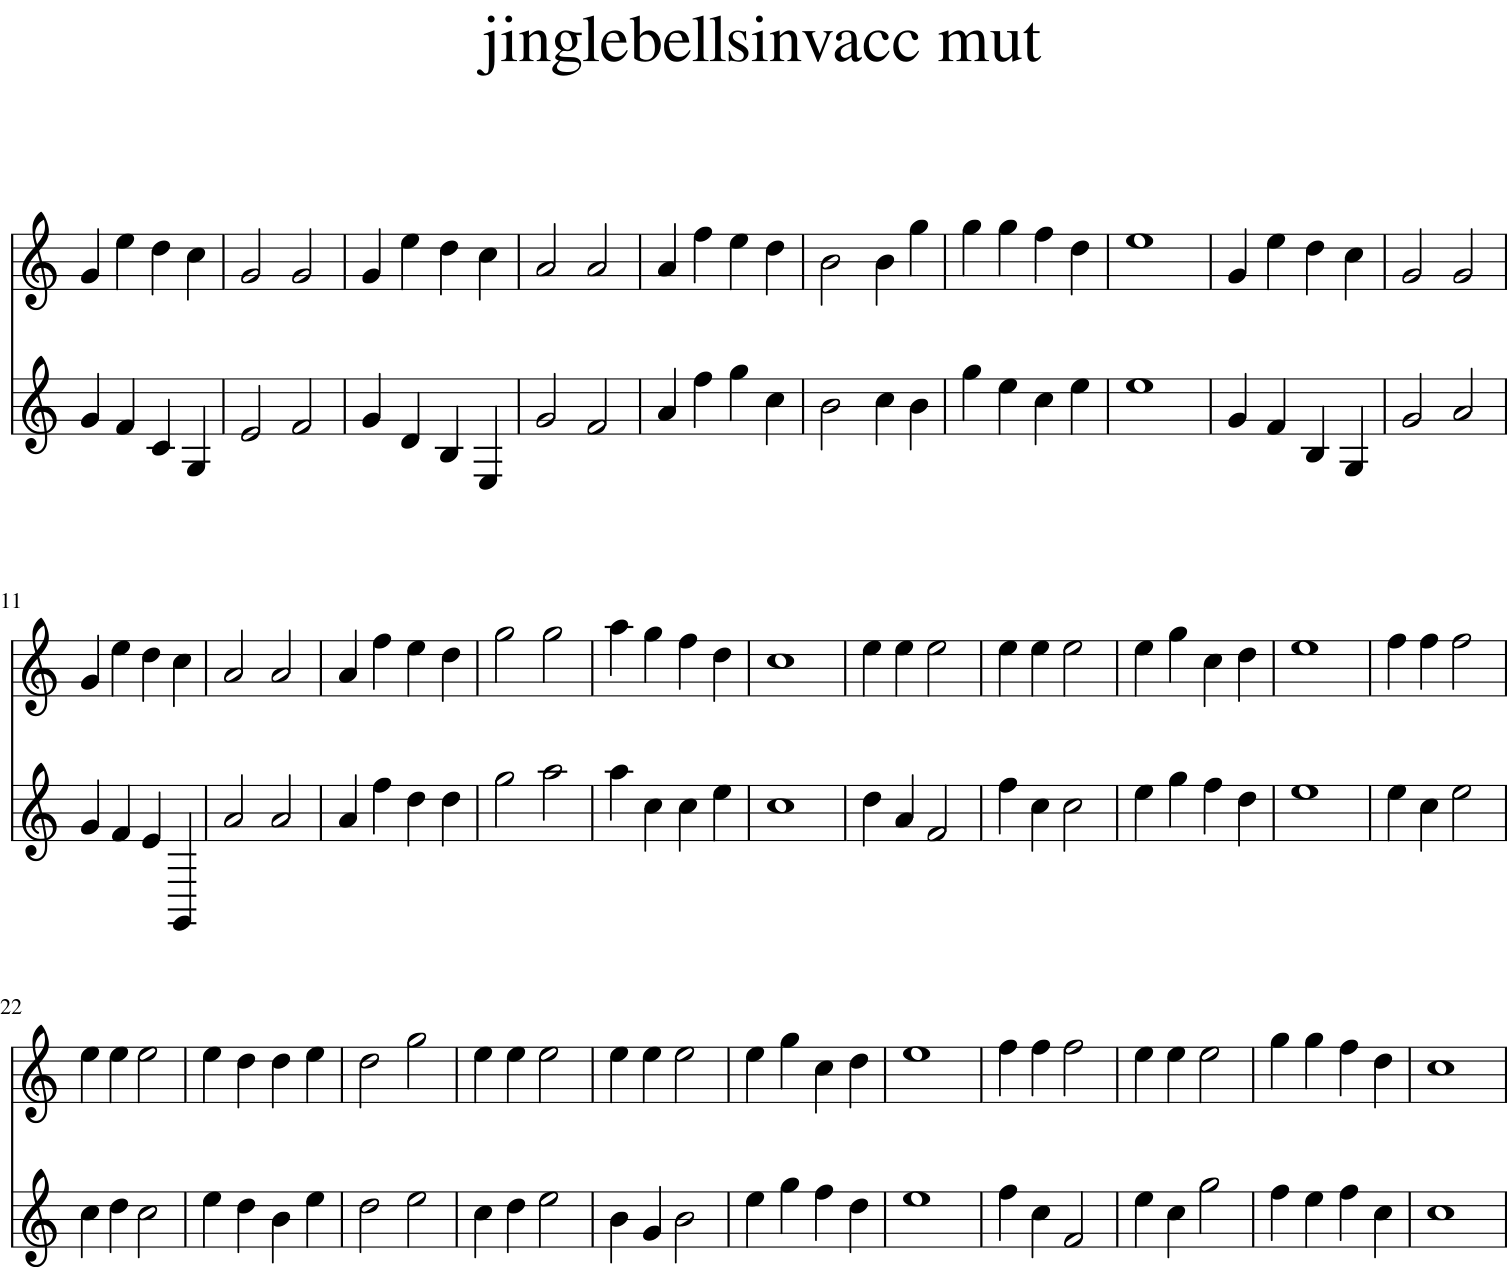

In [33]:
#make parts
m21Part_main = measures_to_m21Part(scoreOriginal.measures)
m21Part_acc = measures_to_m21Part(top3[0].measures)

#build
title = name + 'invacc mut'
m21score_invaccmut = build_m21Score_2p(m21Part_main,m21Part_acc,title,ts)
m21score_invaccmut.show()

In [34]:
m21score_invaccmut.show('midi')

In [35]:
fname = name + 'invaccmut'
fp = '../Outputs/'+ fname + '.mid'
m21score_invaccmut.write('midi', fp=fp)

'../Outputs/jinglebellsinvaccmut.mid'